## Regresión simple usando PyTorch (red neuronal sencilla)

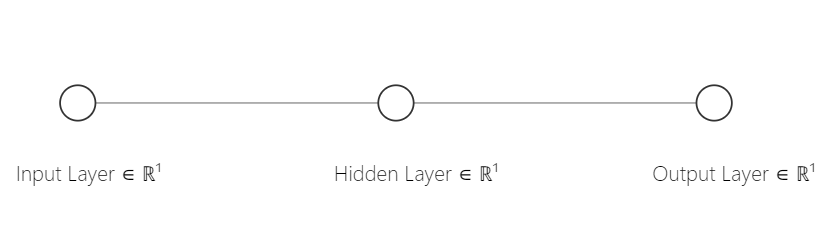

In [239]:
import numpy as np
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
from IPython import display
%config InlineBackend.figure_formats = ['svg']
%matplotlib inline
plt.style.use("dark_background")

### Generamos los datos para la regresión

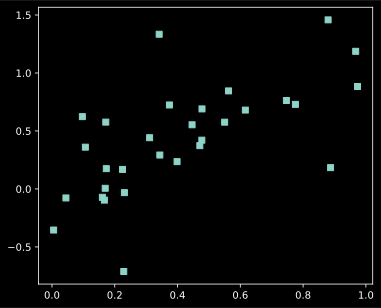

In [332]:
N = 30
x = torch.rand(N,1)
y = x + torch.randn(N,1) / 2

plt.figure(figsize=(6,5))
plt.plot(x,y, 's')
plt.show();

### Creando la arquitectura del modelo en PyTorch

Usaremos el bias para cada uno de los dos nodos (oculto y de salida)

In [333]:
model = nn.Sequential(

    nn.Linear(1,1), #input layer (in_features=1, out=1)
    nn.ReLU(), #apply non-linear (ReLU) activation to the weighted sum of the inputs
    nn.Linear(1,1) #output layer takes the previous input node and also applies the non-linear + weighted sum
    #output size=1
)

In [334]:
model

Sequential(
  (0): Linear(in_features=1, out_features=1, bias=True)
  (1): ReLU()
  (2): Linear(in_features=1, out_features=1, bias=True)
)

### Comenzando el entrenamiento

In [335]:
learning_rate = 0.05

loss_func = nn.MSELoss()

#optimizador (variante del GD (usaremos el Stochastic GD))
optim = torch.optim.SGD(params=model.parameters(),
                       lr=learning_rate)

In [336]:
optim

SGD (
Parameter Group 0
    dampening: 0
    differentiable: False
    foreach: None
    lr: 0.05
    maximize: False
    momentum: 0
    nesterov: False
    weight_decay: 0
)

### Partes del entrenamiento en PyTorch

- ### `Forward Pass` -> calcular la predicción para cada lote de observaciones en cada epoch **sintaxis: `model(x)`**

- ### `Compute Error` -> medir el error que da la predicción respecto a las respectivas etiquetas reales **sintaxis: `loss_func(y_hat, y)`**

- ### `Backward Pass` -> en base a dicho error, derivar parcialmente el error total en términos de cada parámetro ajustable usando la regla de la cadena **sintaxis: `optim.zero_grad()`, `loss.backward()`, `optimizer.step()`**

In [337]:
n_epochs = 500
losses = torch.zeros(n_epochs)

#entrenamiento
for epoch in range(n_epochs):
    
    #forward pass
    y_hat = model(x)
    
    #compute error
    loss = loss_func(y_hat, y)
    losses[epoch] = loss
    
    #backward pass
    optim.zero_grad() #reininciamos las derivadas parciales a ser cero
    loss.backward() #calculamos el gradiente en base al error
    optim.step() #actualiza todos los valores de los pesos

### Calcular la pérdida manualmente post-entrenamiento

*Los tensores podemos usarlos para visualización o uso en numpy usando `my_tensor.detach()`*

*La función `my_tensor.item()` devuelve el tensor como número de python*

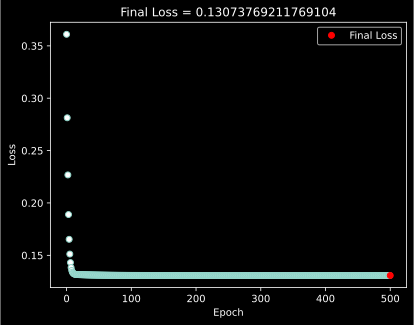

In [338]:
preds = model(x)

#MSE (pérdida post-entrenamiento)
test_loss = (preds-y).pow(2).mean()

plt.plot(losses.detach(), "o", markerfacecolor="w", linewidth=1)
plt.plot(n_epochs, test_loss.detach(), "ro", label="Final Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend();
plt.title(f"Final Loss = {test_loss.item()}")
plt.show()

#### Para esta versión aleatoria de los datos de entrenamiento, el modelo fue decreciendo su pérdida de forma gradual durante las epochs. Vemos que hubiera necesitado tan sólo alrededor de 20 epochs para conseguir el mismo resultado

### Visualizar el modelo

*Para visualizar la gráfica, también calcularemos el coeficiente de correlación entre los datos reales y las predicciones **(cuanto más cercano a 1, más parecidos)***. *Sin embargo, al ser los datos aleatorios, puede el modelo no ser bueno a dichas observaciones, y ser incluso una línea recta (misma predicción para cualquier valor de x), dando errores en el cálculo de dicho coeficient*

In [339]:
corr = np.corrcoef(y.T, preds.detach().T)[0,1]


In [340]:
corr

0.6435285018349255

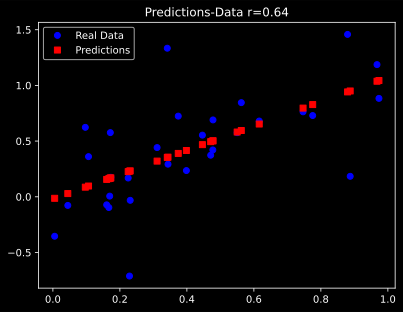

In [341]:
plt.plot(x,y, "bo", label="Real Data")
plt.plot(x, preds.detach(), "rs", label="Predictions")

plt.title(f"Predictions-Data r={corr:.2f}")
plt.legend();
plt.show();

_________

Additional Explorations C:\Users\pablo\Mi unidad\Neural Networks\resources\courses\Udemy\A deep understanding of deep learning (with Python intro) - Mike X Cohen\code\ANN\DUDL_ANN_regression.ipynb

> 1) How much data is "enough"? Try different values of N and see how low the loss gets. 
   Do you still get low loss ("low" is subjective, but let's say loss<.25) with N=10? N=5?

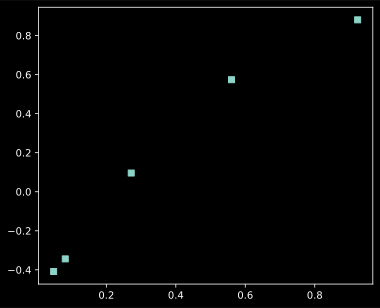

In [370]:
N = 5
x = torch.rand(N,1)
y = x + torch.randn(N,1) / 2

plt.figure(figsize=(6,5))
plt.plot(x,y, 's')
plt.show();

### Creando la arquitectura del modelo en PyTorch

Usaremos el bias para cada uno de los dos nodos (oculto y de salida)

In [371]:
model = nn.Sequential(

    nn.Linear(1,1), #input layer (in_features=1, out=1)
    nn.ReLU(), #apply non-linear (ReLU) activation to the weighted sum of the inputs
    nn.Linear(1,1) #output layer takes the previous input node and also applies the non-linear + weighted sum
    #output size=1
)

In [372]:
model

Sequential(
  (0): Linear(in_features=1, out_features=1, bias=True)
  (1): ReLU()
  (2): Linear(in_features=1, out_features=1, bias=True)
)

### Comenzando el entrenamiento

In [373]:
learning_rate = 0.05

loss_func = nn.MSELoss()

#optimizador (variante del GD (usaremos el Stochastic GD))
optim = torch.optim.SGD(params=model.parameters(),
                       lr=learning_rate)

In [374]:
optim

SGD (
Parameter Group 0
    dampening: 0
    differentiable: False
    foreach: None
    lr: 0.05
    maximize: False
    momentum: 0
    nesterov: False
    weight_decay: 0
)

### Partes del entrenamiento en PyTorch

- ### `Forward Pass` -> calcular la predicción para cada lote de observaciones en cada epoch **sintaxis: `model(x)`**

- ### `Compute Error` -> medir el error que da la predicción respecto a las respectivas etiquetas reales **sintaxis: `loss_func(y_hat, y)`**

- ### `Backward Pass` -> en base a dicho error, derivar parcialmente el error total en términos de cada parámetro ajustable usando la regla de la cadena **sintaxis: `optim.zero_grad()`, `loss.backward()`, `optimizer.step()`**

In [375]:
n_epochs = 500
losses = torch.zeros(n_epochs)

#entrenamiento
for epoch in range(n_epochs):
    
    #forward pass
    y_hat = model(x)
    
    #compute error
    loss = loss_func(y_hat, y)
    losses[epoch] = loss
    
    #backward pass
    optim.zero_grad() #reininciamos las derivadas parciales a ser cero
    loss.backward() #calculamos el gradiente en base al error
    optim.step() #actualiza todos los valores de los pesos

### Calcular la pérdida manualmente post-entrenamiento

*Los tensores podemos usarlos para visualización o uso en numpy usando `my_tensor.detach()`*

*La función `my_tensor.item()` devuelve el tensor como número de python*

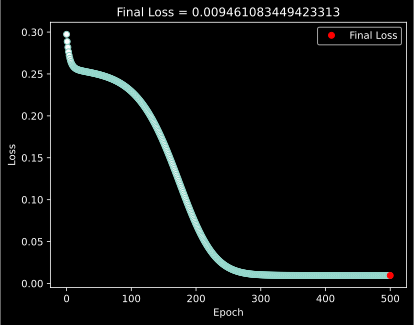

In [376]:
preds = model(x)

#MSE (pérdida post-entrenamiento)
test_loss = (preds-y).pow(2).mean()

plt.plot(losses.detach(), "o", markerfacecolor="w", linewidth=1)
plt.plot(n_epochs, test_loss.detach(), "ro", label="Final Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend();
plt.title(f"Final Loss = {test_loss.item()}")
plt.show()

#### Para esta versión aleatoria de los datos de entrenamiento, el modelo fue decreciendo su pérdida de forma gradual durante las epochs. Vemos que hubiera necesitado tan sólo alrededor de 20 epochs para conseguir el mismo resultado

### Visualizar el modelo

*Para visualizar la gráfica, también calcularemos el coeficiente de correlación entre los datos reales y las predicciones **(cuanto más cercano a 1, más parecidos)***. *Sin embargo, al ser los datos aleatorios, puede el modelo no ser bueno a dichas observaciones, y ser incluso una línea recta (misma predicción para cualquier valor de x), dando errores en el cálculo de dicho coeficient*

In [377]:
corr = np.corrcoef(y.T, preds.detach().T)[0,1]


In [378]:
corr

0.9812297759442568

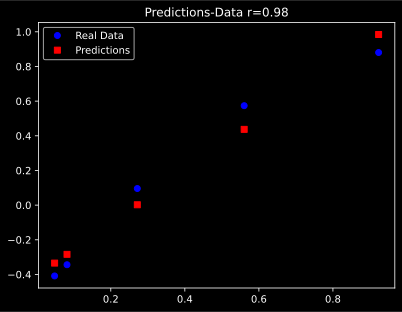

In [380]:
plt.plot(x,y, "bo", label="Real Data")
plt.plot(x, preds.detach(), "rs", label="Predictions")

plt.title(f"Predictions-Data r={corr:.2f}")
plt.legend();
plt.show();

Con N=5, (5 observaciones aleatorias) el modelo, consigue tener la máxima precisión, pudiendo ser overfitting. Tan solo dependía de cómo se inincializaran los datos aleatorios, repercutiría en el desempeño del modelo, o si consigue ajustarse o no

______

> 2) Does your conclusion above depend on the amount of noise in the data? Try changing the noise level
   by changing the division ("/2") when creating y as x+randn.

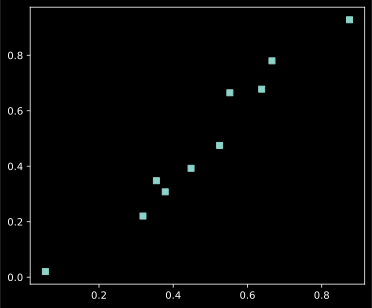

In [409]:
N = 10
x = torch.rand(N,1)
y = x + torch.randn(N,1) / 10

plt.figure(figsize=(6,5))
plt.plot(x,y, 's')
plt.show();

### Creando la arquitectura del modelo en PyTorch

Usaremos el bias para cada uno de los dos nodos (oculto y de salida)

In [410]:
model = nn.Sequential(

    nn.Linear(1,1), #input layer (in_features=1, out=1)
    nn.ReLU(), #apply non-linear (ReLU) activation to the weighted sum of the inputs
    nn.Linear(1,1) #output layer takes the previous input node and also applies the non-linear + weighted sum
    #output size=1
)

In [411]:
model

Sequential(
  (0): Linear(in_features=1, out_features=1, bias=True)
  (1): ReLU()
  (2): Linear(in_features=1, out_features=1, bias=True)
)

### Comenzando el entrenamiento

In [412]:
learning_rate = 0.05

loss_func = nn.MSELoss()

#optimizador (variante del GD (usaremos el Stochastic GD))
optim = torch.optim.SGD(params=model.parameters(),
                       lr=learning_rate)

In [413]:
optim

SGD (
Parameter Group 0
    dampening: 0
    differentiable: False
    foreach: None
    lr: 0.05
    maximize: False
    momentum: 0
    nesterov: False
    weight_decay: 0
)

### Partes del entrenamiento en PyTorch

- ### `Forward Pass` -> calcular la predicción para cada lote de observaciones en cada epoch **sintaxis: `model(x)`**

- ### `Compute Error` -> medir el error que da la predicción respecto a las respectivas etiquetas reales **sintaxis: `loss_func(y_hat, y)`**

- ### `Backward Pass` -> en base a dicho error, derivar parcialmente el error total en términos de cada parámetro ajustable usando la regla de la cadena **sintaxis: `optim.zero_grad()`, `loss.backward()`, `optimizer.step()`**

In [414]:
n_epochs = 500
losses = torch.zeros(n_epochs)

#entrenamiento
for epoch in range(n_epochs):
    
    #forward pass
    y_hat = model(x)
    
    #compute error
    loss = loss_func(y_hat, y)
    losses[epoch] = loss
    
    #backward pass
    optim.zero_grad() #reininciamos las derivadas parciales a ser cero
    loss.backward() #calculamos el gradiente en base al error
    optim.step() #actualiza todos los valores de los pesos

### Calcular la pérdida manualmente post-entrenamiento

*Los tensores podemos usarlos para visualización o uso en numpy usando `my_tensor.detach()`*

*La función `my_tensor.item()` devuelve el tensor como número de python*

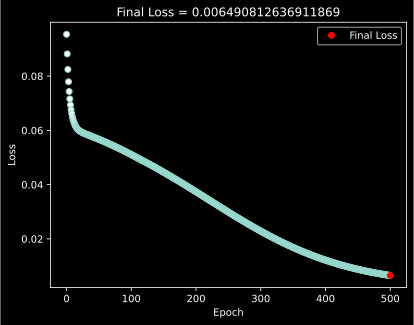

In [415]:
preds = model(x)

#MSE (pérdida post-entrenamiento)
test_loss = (preds-y).pow(2).mean()

plt.plot(losses.detach(), "o", markerfacecolor="w", linewidth=1)
plt.plot(n_epochs, test_loss.detach(), "ro", label="Final Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend();
plt.title(f"Final Loss = {test_loss.item()}")
plt.show()

#### Para esta versión aleatoria de los datos de entrenamiento, el modelo fue decreciendo su pérdida de forma gradual durante las epochs. Vemos que hubiera necesitado tan sólo alrededor de 20 epochs para conseguir el mismo resultado

### Visualizar el modelo

*Para visualizar la gráfica, también calcularemos el coeficiente de correlación entre los datos reales y las predicciones **(cuanto más cercano a 1, más parecidos)***. *Sin embargo, al ser los datos aleatorios, puede el modelo no ser bueno a dichas observaciones, y ser incluso una línea recta (misma predicción para cualquier valor de x), dando errores en el cálculo de dicho coeficient*

In [416]:
corr = np.corrcoef(y.T, preds.detach().T)[0,1]


In [417]:
corr

0.977782961981068

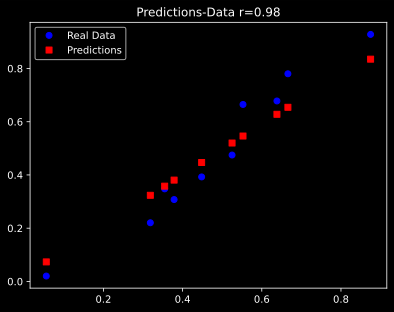

In [418]:
plt.plot(x,y, "bo", label="Real Data")
plt.plot(x, preds.detach(), "rs", label="Predictions")

plt.title(f"Predictions-Data r={corr:.2f}")
plt.legend();
plt.show();

Cambiando el divisor, obtenemos también un desempeño mejor por parte del modelo, ya que los datos aleatorios se encuentran más "normalizados" entre un rango de valores fijo

3) Notice that the model doesn't always work well. Put the original code (that is, N=30 and /2 noise)
   into a function or a for-loop and repeat the training 100 times (each time using a fresh model instance).
   Then count the number of times the model had a loss>.25.

In [421]:
n_reps = 100
overall_losses = torch.zeros((n_reps, 500))

for n in range(n_reps):
    
    N = 30
    x = torch.rand(N,1)
    y = x + torch.randn(N,1) / 2


    model = nn.Sequential(

        nn.Linear(1,1), #input layer (in_features=1, out=1)
        nn.ReLU(), #apply non-linear (ReLU) activation to the weighted sum of the inputs
        nn.Linear(1,1) #output layer takes the previous input node and also applies the non-linear + weighted sum
        #output size=1
    )

    learning_rate = 0.05

    loss_func = nn.MSELoss()

    #optimizador (variante del GD (usaremos el Stochastic GD))
    optim = torch.optim.SGD(params=model.parameters(),
                           lr=learning_rate)

    n_epochs = 500
    losses = torch.zeros(n_epochs)

    #entrenamiento
    for epoch in range(n_epochs):

        #forward pass
        y_hat = model(x)

        #compute error
        loss = loss_func(y_hat, y)
        losses[epoch] = loss

        #backward pass
        optim.zero_grad() #reininciamos las derivadas parciales a ser cero
        loss.backward() #calculamos el gradiente en base al error
        optim.step() #actualiza todos los valores de los pesos
        
    overall_losses[n] = losses

In [429]:
overall_losses[:,1]

tensor([1.4094, 0.7214, 0.3124, 0.4334, 0.3176, 0.8037, 0.4277, 0.5099, 0.4555,
        1.1887, 0.4186, 1.2151, 0.5686, 0.8673, 0.6065, 0.3721, 0.3938, 1.7415,
        0.6370, 1.3926, 0.9584, 0.5582, 0.2405, 0.9321, 1.1766, 1.3591, 0.2683,
        0.3328, 1.3865, 0.6022, 0.4028, 0.7451, 1.5026, 1.2223, 2.5348, 1.2872,
        0.2664, 0.2221, 2.5382, 0.4551, 0.3841, 0.7312, 1.3366, 0.2297, 0.4785,
        0.3914, 1.1093, 0.8194, 1.5932, 0.4562, 0.2904, 0.3451, 0.7272, 0.6104,
        0.3294, 0.7034, 0.8269, 1.9613, 0.3859, 0.2728, 0.5381, 0.4024, 1.3800,
        2.2219, 2.2510, 0.3139, 0.7868, 0.7564, 0.5850, 0.4121, 0.3247, 0.5937,
        0.3878, 1.0561, 0.2375, 0.5752, 0.2306, 0.9819, 1.2068, 1.1189, 0.4866,
        0.8545, 1.9160, 0.4659, 0.5885, 0.3827, 0.4189, 0.2864, 0.2970, 0.4431,
        0.4008, 0.4624, 2.1010, 0.6235, 0.2602, 0.3549, 0.4967, 0.2813, 2.1290,
        1.3934], grad_fn=<SelectBackward0>)

In [430]:
overall_losses.shape

torch.Size([100, 500])

In [437]:
overall_losses[torch.where(overall_losses > 0.25)].mean()

tensor(0.3375, grad_fn=<MeanBackward0>)

In [453]:
(overall_losses > 0.25).sum()

tensor(32639)

De nuestro tensor de 100 pruebas de entrenamientos del modelo con 500 epochs cada prueba, (100*500=50,000 iteraciones totales), en 32,639 de dichas iteraciones el modelo tuvo una pérdida mayor a 0.25 en MSE. **No obstante, los datos son aleatorios en cada uno de los 100 experimentos**

____________

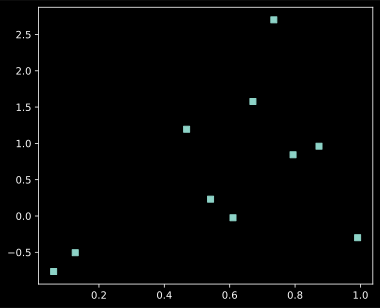

In [ ]:
N = 10
x = torch.rand(N,1)
y = x + torch.randn(N,1) / 1

plt.figure(figsize=(6,5))
plt.plot(x,y, 's')
plt.show();

### Creando la arquitectura del modelo en PyTorch

Usaremos el bias para cada uno de los dos nodos (oculto y de salida)

In [ ]:
model = nn.Sequential(

    nn.Linear(1,1), #input layer (in_features=1, out=1)
    # nn.ReLU(), #apply non-linear (ReLU) activation to the weighted sum of the inputs
    # nn.Linear(1,1), #output layer takes the previous input node and also applies the non-linear + weighted sum
    nn.Sigmoid()
    #output size=1
)

In [ ]:
model

Sequential(
  (0): Linear(in_features=1, out_features=1, bias=True)
  (1): Sigmoid()
)

### Comenzando el entrenamiento

In [ ]:
learning_rate = 0.01

loss_func = nn.MSELoss()

#optimizador (variante del GD (usaremos el Stochastic GD))
optim = torch.optim.SGD(params=model.parameters(),
                       lr=learning_rate)

In [ ]:
optim

SGD (
Parameter Group 0
    dampening: 0
    differentiable: False
    foreach: None
    lr: 0.01
    maximize: False
    momentum: 0
    nesterov: False
    weight_decay: 0
)

### Partes del entrenamiento en PyTorch

- ### `Forward Pass` -> calcular la predicción para cada lote de observaciones en cada epoch **sintaxis: `model(x)`**

- ### `Compute Error` -> medir el error que da la predicción respecto a las respectivas etiquetas reales **sintaxis: `loss_func(y_hat, y)`**

- ### `Backward Pass` -> en base a dicho error, derivar parcialmente el error total en términos de cada parámetro ajustable usando la regla de la cadena **sintaxis: `optim.zero_grad()`, `loss.backward()`, `optimizer.step()`**

In [ ]:
n_epochs = 15000
losses = torch.zeros(n_epochs)

#entrenamiento
for epoch in range(n_epochs):
    
    #forward pass
    y_hat = model(x)
    
    #compute error
    loss = loss_func(y_hat, y)
    losses[epoch] = loss
    
    #backward pass
    optim.zero_grad() #reininciamos las derivadas parciales a ser cero
    loss.backward() #calculamos el gradiente en base al error
    optim.step() #actualiza todos los valores de los pesos

### Calcular la pérdida manualmente post-entrenamiento

*Los tensores podemos usarlos para visualización o uso en numpy usando `my_tensor.detach()`*

*La función `my_tensor.item()` devuelve el tensor como número de python*

In [ ]:
preds = model(x)

#MSE (pérdida post-entrenamiento)
test_loss = (preds-y).pow(2).mean()

plt.plot(losses.detach(), "o", markerfacecolor="w", linewidth=1)
plt.plot(n_epochs, test_loss.detach(), "ro", label="Final Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend();
plt.title(f"Final Loss = {test_loss.item()}")
plt.show()

#### Para esta versión aleatoria de los datos de entrenamiento, el modelo fue decreciendo su pérdida de forma gradual durante las epochs. Vemos que hubiera necesitado tan sólo alrededor de 20 epochs para conseguir el mismo resultado

### Visualizar el modelo

*Para visualizar la gráfica, también calcularemos el coeficiente de correlación entre los datos reales y las predicciones **(cuanto más cercano a 1, más parecidos)***. *Sin embargo, al ser los datos aleatorios, puede el modelo no ser bueno a dichas observaciones, y ser incluso una línea recta (misma predicción para cualquier valor de x), dando errores en el cálculo de dicho coeficient*

In [ ]:
corr = np.corrcoef(y.T, preds.detach().T)[0,1]


In [ ]:
corr

In [ ]:
plt.plot(x,y, "bo", label="Real Data")
plt.plot(x, preds.detach(), "rs", label="Predictions")

plt.title(f"Predictions-Data r={corr:.2f}")
plt.legend();
plt.show();

In [ ]:
model(torch.tensor([0.0]))

tensor([-0.0936], grad_fn=<AddBackward0>)